# NMDA homework 1, question 2 Parkinson
王敏行 ID:2018012386 wangmx18@mails.tsinghua.edu.cn

Following codes are generated with the help of official documents and books.

## Part1: Logistic Regression on Parkinson dataset


In [16]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

pa = pd.read_table('parkinsons.data',sep=",")

x = pa.drop(['name','status'], axis=1)
X = np.array(x)
features = x.columns
print(features)
# X = np.array(pa.iloc[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1])
#"status" 0 for healthy and 1 for PD
y = pa.status
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0]))

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')
data shape: (195, 22); no. positive: 147; no. negative: 48


In [17]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l1',solver='liblinear') #solver='liblinear', default solver lbfgs doesn't support l1 penalty
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('LR matchs: {0}/{1}'.format(np.equal(y_pred, y_test).shape[0], y_test.shape[0]))
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('SVM matchs: {0}/{1}'.format(np.equal(y_pred, y_test).shape[0], y_test.shape[0]))

LR matchs: 39/39
SVM matchs: 39/39


To obtain more solid conclusion, we repeat the train-test split process several times.

In [19]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    for model in [LR, svm]:
        print('model is', model)
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
            train_score=train_score, test_score=test_score))

model is LogisticRegression(penalty='l1', solver='liblinear')
train score: 0.852564; test score: 0.820513
model is SVC(kernel='linear')
train score: 0.871795; test score: 0.871795
model is LogisticRegression(penalty='l1', solver='liblinear')
train score: 0.833333; test score: 0.897436
model is SVC(kernel='linear')
train score: 0.871795; test score: 0.923077
model is LogisticRegression(penalty='l1', solver='liblinear')
train score: 0.871795; test score: 0.820513
model is SVC(kernel='linear')
train score: 0.903846; test score: 0.846154
model is LogisticRegression(penalty='l1', solver='liblinear')
train score: 0.858974; test score: 0.820513
model is SVC(kernel='linear')
train score: 0.897436; test score: 0.820513
model is LogisticRegression(penalty='l1', solver='liblinear')
train score: 0.897436; test score: 0.743590
model is SVC(kernel='linear')
train score: 0.897436; test score: 0.820513


上面重复了5次，从test accuracy的结果来看，线性SVM的表现更好。
Logistic回归的目的是使得总loss最小，SVM的优化目的是使得margin最大。二者最终的目的都是使得代价函数$J(w)$最小。其中，Logistic回归采用p1正则项，其代价函数为
$$
J(w)=\lambda \sum|\theta|+\sum y_i log(h_{\theta}(x_i))+(1-y_i) log(1-h_{\theta}(x_i)))
$$
SVM的代价函数为
$$
J(w)=\lambda \sum\theta^2+\sum(h_{\theta}(x_i)-y_i)^2
$$
说明这个问题情景下，采用SVM更合适。

## Part 2: the most important feature

In [20]:
feature_names = list(features)
for i in range(22):
    XX = np.delete(X,i, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2)
    svm.fit(X_train, y_train)
    train_score = svm.score(X_train, y_train)
    test_score = svm.score(X_test, y_test)
    print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
        train_score=train_score, test_score=test_score),'feature', feature_names[i], i+1)


train score: 0.884615; test score: 0.846154 feature MDVP:Fo(Hz) 1
train score: 0.884615; test score: 0.820513 feature MDVP:Fhi(Hz) 2
train score: 0.858974; test score: 0.948718 feature MDVP:Flo(Hz) 3
train score: 0.852564; test score: 0.897436 feature MDVP:Jitter(%) 4
train score: 0.891026; test score: 0.871795 feature MDVP:Jitter(Abs) 5
train score: 0.891026; test score: 0.897436 feature MDVP:RAP 6
train score: 0.871795; test score: 0.846154 feature MDVP:PPQ 7
train score: 0.923077; test score: 0.717949 feature Jitter:DDP 8
train score: 0.865385; test score: 0.923077 feature MDVP:Shimmer 9
train score: 0.884615; test score: 0.820513 feature MDVP:Shimmer(dB) 10
train score: 0.878205; test score: 0.897436 feature Shimmer:APQ3 11
train score: 0.891026; test score: 0.794872 feature Shimmer:APQ5 12
train score: 0.884615; test score: 0.897436 feature MDVP:APQ 13
train score: 0.865385; test score: 0.897436 feature Shimmer:DDA 14
train score: 0.891026; test score: 0.820513 feature NHR 15
trai

通过随机删除某一个特征，用剩下的21维特征进行训练并验证其测试集上准确度。则可以认为，test score较低的的数据集对应的去掉的特征是重要的。
发现得到的结果与`train_test_split`中的参数`random_state`关系密切，波动较大。故可以认为，不存在对于分类贡献较大的单一特征。或者存在至少两个或以上可以用于分类的特征，从而去掉一个feature对于结果影响不大。
方法改进：可以通过多次训练、打分、取平均值的方式减弱random_state的影响。还可以按照status和某一feature之间的信息熵变，计算出22个feature带来的信息熵变。变化最大的理应贡献最大。

## Part 3: Grid Search

best param: {'C': 0.5644444444444445, 'gamma': 0.001}
best score: 0.7846153846153847


Text(0, 0.5, 'gamma')

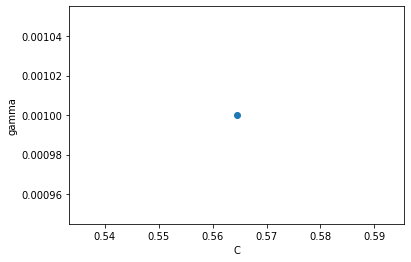

In [21]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

range_gamma = np.linspace(0.001, 5, 20)
range_c = np.linspace(0.01,5,10)
param_grid = {'gamma': range_gamma,'C':range_c}
clf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_,clf.best_score_))
clf.best_estimator_

best_point = list(clf.best_params_.values())
C_best = best_point[0]
gamma_best = best_point[1]
plt.scatter(C_best,gamma_best)
plt.xlabel('C')
plt.ylabel('gamma')